# Meta-Sampling: Estratégia de seleção de instâncias baseada em meta-aprendizado

## Imports

In [38]:
import os
import warnings 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Elaboração de meta-base 

In [2]:
DATA_DIR = '../../scripts/metabase/'

In [3]:

dfs = []
for root, _, files in os.walk(DATA_DIR):
    
    if not len(files):
        continue
        
    df = pd.concat(pd.read_csv(os.path.join(root,file)) for file in files).set_index(['dataset_id','estimator', 'query_number'])
    dfs.append(df)

In [4]:
metabase = pd.concat(dfs)
metabase

attr_conc.mean  attr_conc.sd  \
dataset_id estimator              query_number                                 
43942.0    DecisionTreeClassifier 0.0                 0.065967      0.152784   
                                  1.0                 0.151950      0.226137   
                                  2.0                 0.189951      0.231253   
                                  3.0                 0.334987      0.234370   
                                  4.0                 0.171564      0.233608   
...                                                        ...           ...   
740.0      KNeighborsClassifier   95.0                0.036479      0.052695   
                                  96.0                0.036542      0.053085   
                                  97.0                0.037300      0.054141   
                                  98.0                0.038074      0.054225   
                                  99.0                0.037691      0.053868   

                                                attr_ent.mean   attr_ent.sd  \
dataset_id estimator              query_number                                
43942.0    DecisionTreeClassifier 0.0                0.367489  4.934092e-01   
                                  1.0                0.367139  4.925772e-01   
                                  2.0                0.367192  4.925414e-01   
                                  3.0                0.367990  4.934186e-01   
                                  4.0                0.367776  4.932672e-01   
...                                                       ...           ...   
740.0      KNeighborsClassifier   95.0               2.584963  4.681111e-16   
                                  96.0               2.584825  5.977255e-05   
                                  97.0               2.584877  4.681111e-16   
                                  98.0               2.584863  4.681111e-16   
                                  99.0               2.584870  0.000000e+00   

                                                attr_to_inst  cat_to_num  \
dataset_id estimator              query_number                             
43942.0    DecisionTreeClassifier 0.0               0.130240         0.0   
                                  1.0               0.131222         0.0   
                                  2.0               0.132219         0.0   
                                  3.0               0.133231         0.0   
                                  4.0               0.134259         0.0   
...                                                      ...         ...   
740.0      KNeighborsClassifier   95.0              0.037037         0.0   
                                  96.0              0.037736         0.0   
                                  97.0              0.038462         0.0   
                                  98.0              0.039216         0.0   
                                  99.0              0.040000         0.0   

                                                cohesiveness.mean  \
dataset_id estimator              query_number                      
43942.0    DecisionTreeClassifier 0.0                   54.291776   
                                  1.0                   53.931137   
                                  2.0                   53.511161   
                                  3.0                   52.988275   
                                  4.0                   52.660639   
...                                                           ...   
740.0      KNeighborsClassifier   95.0                  90.864815   
                                  96.0                  89.426415   
                                  97.0                  87.536538   
                                  98.0                  86.207843   
                                  99.0                  84.534000   

                                                cohesiveness.sd  cor.mean  \
dataset_id esti

Fazendo download do arquivo:

## Treinamento de Meta-Modelo

Substituindo valores infinitos por `np.nan`

In [5]:
metabase.replace([np.inf, -np.inf], np.nan, inplace=True)

Separando uma base para teste e o restante para treinamento (LOO)

In [6]:
train_index = metabase.index.levels[0][:-1]
test_index = metabase.index.levels[0][-1:]

len(train_index), len(test_index)

(59, 1)

Separando features e rótulos (utilizando apenas o classificador SVM)

In [7]:
train_data = metabase.loc[train_index].xs("SVC", level='estimator').reset_index()
test_data = metabase.loc[test_index].xs("SVC", level='estimator').reset_index()

In [8]:
test_data

,dataset_id,query_number,attr_conc.mean,attr_conc.sd,attr_ent.mean,attr_ent.sd,attr_to_inst,cat_to_num,cohesiveness.mean,cohesiveness.sd,...,ch,int,nre,pb,sc,sil,vdb,vdu,best_strategy,best_score
0,44720.0,0.0,0.011365,0.018764,2.637889,0.372577,0.004013,0.0,461.455518,36.556053,...,317.337079,9.528633,0.646510,-0.421633,0.0,0.191343,2.040229,2.549379e-07,vote_entropy_sampling,0.626
1,44720.0,1.0,0.011369,0.018666,2.635710,0.370261,0.004027,0.0,459.989933,36.438445,...,288.793206,9.304015,1.550497,-0.536494,0.0,0.207025,1.660453,4.733878e-07,uncertainty_batch_sampling,0.648
2,44720.0,2.0,0.011427,0.018776,2.638311,0.372282,0.004040,0.0,458.793603,36.398854,...,323.553696,9.623611,0.600546,-0.426303,0.0,0.201981,1.889103,5.920915e-07,consensus_entropy_sampling,0.648
3,44720.0,3.0,0.011467,0.018754,2.635707,0.369688,0.004054,0.0,457.117905,36.219593,...,305.928817,9.631013,0.584865,-0.414774,0.0,0.197936,1.903194,6.059980e-07,margin_sampling,0.644
4,44720.0,4.0,0.011521,0.018863,2.636109,0.369655,0.004068,0.0,455.685085,36.139941,...,278.381832,9.218159,1.568650,-0.528442,0.0,0.204237,1.752124,4.858338e-07,margin_sampling,0.662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,44720.0,95.0,0.012705,0.013653,2.571241,0.399469,0.005882,0.0,317.311765,26.499779,...,197.860764,9.199268,1.559013,-0.537890,0.0,0.210309,1.706283,1.076967e-06,consensus_entropy_sampling,0.764
96,44720.0,96.0,0.012844,0.013783,2.571299,0.399584,0.005911,0.0,315.641379,26.242163,...,201.445305,9.142629,1.583040,-0.528715,0.0,0.203128,1.624985,1.199749e-06,max_disagreement_sampling,0.764
97,44720.0,97.0,0.012839,0.013836,2.571547,0.399576,0.005941,0.0,314.074257,26.108413,...,217.034764,9.281748,1.088005,-0.475973,0.0,0.187072,1.836345,5.191874e-07,uncertainty_sampling,0.768
98,44720.0,98.0,0.012888,0.013876,2.571348,0.399550,0.005970,0.0,312.488308,25.988575,...,220.874742,9.148061,1.377955,-0.520801,0.0,0.199740,1.551950,1.031027e-06,entropy_sampling,0.770


Separando conjuntos em treino e teste

In [10]:
columns_to_drop = ['dataset_id', 'best_strategy', 'best_score', 'query_number']

X_train = train_data.drop(columns=columns_to_drop)
y_train = train_data['best_strategy']

X_test = test_data.drop(columns=columns_to_drop)
y_test = test_data['best_strategy']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2874, 71) (2874,)
(100, 71) (100,)


Induzindo modelo

In [11]:
import numpy as np 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


clf = Pipeline([
    ('mean_inputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('meta-model', RandomForestClassifier())
])

clf.fit(X_train.values, y_train)

/home/gabriel/UnB/PIBIC/meta-active-learning/venv/lib/python3.8/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [41]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Pipeline(steps=[('mean_inputer', SimpleImputer()),
                ('meta-model', RandomForestClassifier())])

In [12]:
import pickle as pkl

with open('meta_model.pkl', 'wb') as f:
    pkl.dump(clf, f)

## Implementando Meta-sampling

Sampling strategy utilizada:

In [20]:
from modAL.batch import uncertainty_batch_sampling
from modAL.disagreement import consensus_entropy_sampling, max_disagreement_sampling, vote_entropy_sampling
from modAL.uncertainty import uncertainty_sampling, margin_sampling, entropy_sampling
from pymfe.mfe import MFE

def meta_sampling(classifier, X_pool, n_instances):
    query_strategies = {
        'consensus_entropy_sampling': consensus_entropy_sampling,
        'entropy_sampling': entropy_sampling,
        'margin_sampling': margin_sampling,
        'max_disagreement_sampling': max_disagreement_sampling,
        'uncertainty_batch_sampling': uncertainty_batch_sampling,
        'uncertainty_sampling': uncertainty_sampling,
        'vote_entropy_sampling': vote_entropy_sampling
    }

    # carregando modelo
    with open('meta_model.pkl', 'rb') as f:
        model = pkl.load(f)

    # extração de metafeatures
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        mfe = MFE(groups='all')
        mfe.fit(X_pool)
        names, mfts = mfe.extract()

    X = [mfts]

    selected_strategy = query_strategies[model.predict(X)[0]]

    return selected_strategy(classifier, X_pool, n_instances=n_instances)

/home/gabriel/UnB/PIBIC/meta-active-learning/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Comparando Estratégias

Estratégias padrão que serão comparadas:

In [13]:
from modAL import uncertainty as u, disagreement as d, batch as b

query_strategies = {
   'Uncertainty Sampling': u.uncertainty_sampling,
   'Entropy Sampling': u.entropy_sampling,
   'Margin Sampling': u.margin_sampling,
   'Uncertainty Batch Sampling': b.uncertainty_batch_sampling,
   'Consensus Entropy Sampling': d.consensus_entropy_sampling,
   'Vote Entropy Sampling': d.vote_entropy_sampling,
   'Max Disagreement Sampling': d.max_disagreement_sampling
}

Definindo parâmetros

In [14]:
BATCH_SIZE = 5
N_LABELED_START = 5
RANDOM_STATE = 42
N_QUERIES = 100

Separando cojunto de teste:

In [40]:
%load_ext autoreload
%autoreload 2
    
import sys
sys.path.append('../../scripts/')

from active_learning import ActiveLearningExperiment

dataset_id = int(test_index[0])
exp = ActiveLearningExperiment(dataset_id=dataset_id,
                               initial_labeled_size=N_LABELED_START,
                               n_queries=N_QUERIES,
                               batch_size=BATCH_SIZE,
                               random_state=RANDOM_STATE)

print('Conjunto de treino:', exp.X_train.shape, f'[|L| = {len(exp.labeled_index)}]')
print('Conjunto de teste:',exp.X_test.shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Conjunto de treino: (1500, 6) [|L| = 5]
Conjunto de teste: (500, 6)


Testando as estratégias

In [22]:
from sklearn.svm import SVC
from tqdm.notebook import tqdm

metrics_dict = dict()
for name, strategy in tqdm(query_strategies.items()):
    metrics_dict[name] =  exp.run(estimator=SVC(probability=True),
                                  query_strategy=strategy)

  0%|          | 0/7 [00:00<?, ?it/s]

Testando método proposto

In [24]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category= UserWarning)
    scores_meta_sampling = exp.run(estimator=SVC(probability=True),
                                   query_strategy=meta_sampling,
                                   committee_size=COMMITTEE_SIZE,
                                   batch_size=BATCH_SIZE)

In [25]:
metrics_dict['Meta-sampling'] = scores_meta_sampling

Estabelecendo um *topline* baseado em uma estratégia "perfeita" utilizando a melhor estratégia possível

In [41]:
metrics_dict['Perfect Meta-sampling'] = exp.run_topline(estimator=SVC(probability=True),
                                                        query_strategies=list(query_strategies.values()))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:10<00:00,  1.42it/s]


In [42]:
metrics_dict['Randon Meta-sampling'] = exp.run_baseline(estimator=SVC(probability=True),
                                                        query_strategies=list(query_strategies.values()))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.03it/s]


In [26]:
styles = ['-']*7 + ['s-', '--']

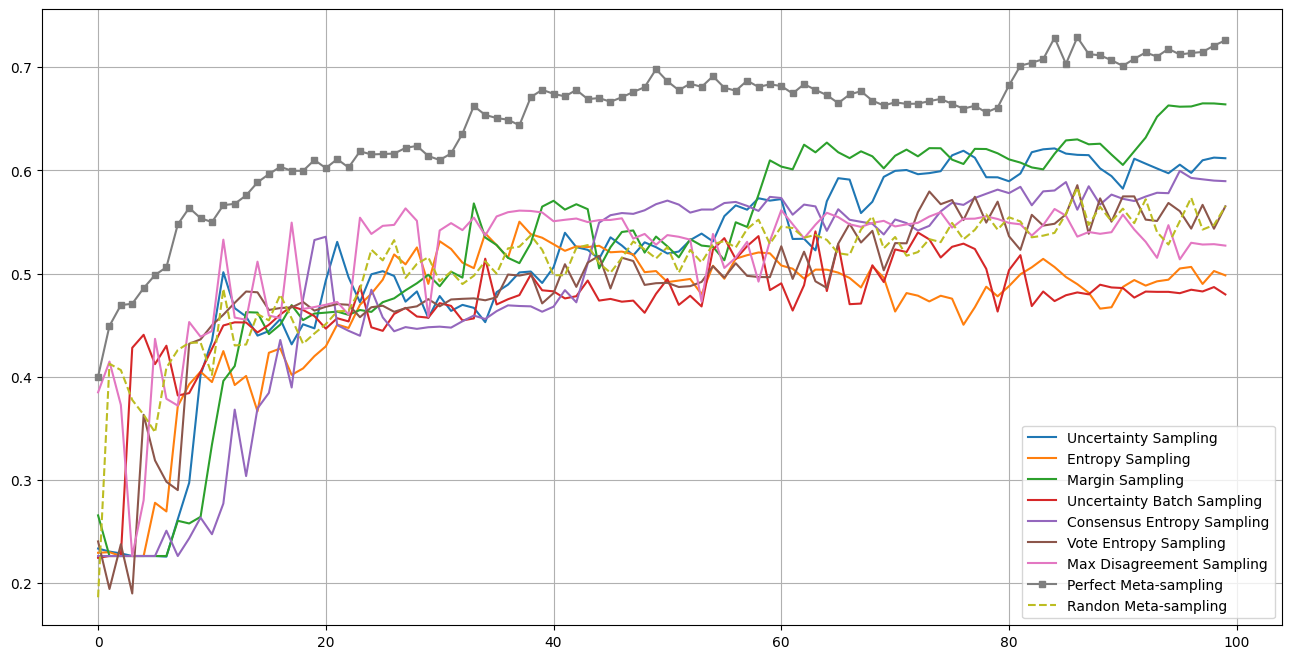

In [43]:
ax = pd.DataFrame(metrics_dict).plot(grid=True, markersize=5,style=styles,  figsize=(16,8))

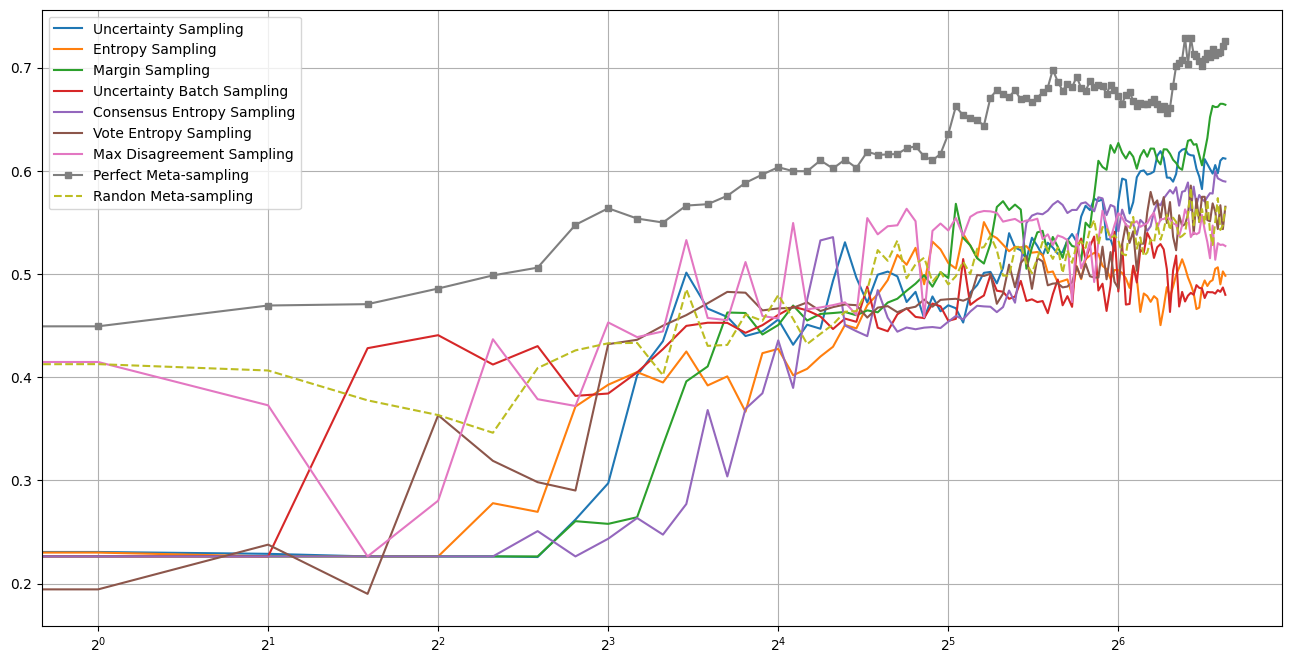

In [44]:
ax = pd.DataFrame(metrics_dict).plot(grid=True, style=styles, markersize=5, figsize=(16,8))
ax.set_xscale('log', base=2)